In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("MLdatanew.csv")

In [3]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,purpose,title
0,25000,25000,25000,60 months,15.05%,C,C4,credit_card,Credit card refinancing
1,26000,26000,26000,36 months,9.93%,B,B2,home_improvement,Home improvement
2,20000,20000,20000,36 months,9.44%,B,B1,credit_card,Credit card refinancing
3,10000,10000,10000,36 months,7.21%,A,A3,credit_card,Credit card refinancing
4,15000,15000,15000,36 months,7.97%,A,A5,debt_consolidation,Debt consolidation


In [4]:
#Capitalize Purpose
purpose_c = lambda x: x.upper()

In [5]:
df['purpose'].apply(purpose_c)

0            CREDIT_CARD
1       HOME_IMPROVEMENT
2            CREDIT_CARD
3            CREDIT_CARD
4     DEBT_CONSOLIDATION
5                MEDICAL
6     DEBT_CONSOLIDATION
7            CREDIT_CARD
8            CREDIT_CARD
9     DEBT_CONSOLIDATION
10    DEBT_CONSOLIDATION
11    DEBT_CONSOLIDATION
12                 HOUSE
13                 OTHER
14                   CAR
15    DEBT_CONSOLIDATION
16           CREDIT_CARD
17      HOME_IMPROVEMENT
18        MAJOR_PURCHASE
19              VACATION
20    DEBT_CONSOLIDATION
21           CREDIT_CARD
22              VACATION
23    DEBT_CONSOLIDATION
24           CREDIT_CARD
25    DEBT_CONSOLIDATION
26    DEBT_CONSOLIDATION
27      HOME_IMPROVEMENT
28               MEDICAL
29    DEBT_CONSOLIDATION
30    DEBT_CONSOLIDATION
31                   CAR
32    DEBT_CONSOLIDATION
33           CREDIT_CARD
34        MAJOR_PURCHASE
35    DEBT_CONSOLIDATION
36           CREDIT_CARD
37    DEBT_CONSOLIDATION
38           CREDIT_CARD
39    DEBT_CONSOLIDATION


In [6]:
df['purpose'].map(purpose_c)

0            CREDIT_CARD
1       HOME_IMPROVEMENT
2            CREDIT_CARD
3            CREDIT_CARD
4     DEBT_CONSOLIDATION
5                MEDICAL
6     DEBT_CONSOLIDATION
7            CREDIT_CARD
8            CREDIT_CARD
9     DEBT_CONSOLIDATION
10    DEBT_CONSOLIDATION
11    DEBT_CONSOLIDATION
12                 HOUSE
13                 OTHER
14                   CAR
15    DEBT_CONSOLIDATION
16           CREDIT_CARD
17      HOME_IMPROVEMENT
18        MAJOR_PURCHASE
19              VACATION
20    DEBT_CONSOLIDATION
21           CREDIT_CARD
22              VACATION
23    DEBT_CONSOLIDATION
24           CREDIT_CARD
25    DEBT_CONSOLIDATION
26    DEBT_CONSOLIDATION
27      HOME_IMPROVEMENT
28               MEDICAL
29    DEBT_CONSOLIDATION
30    DEBT_CONSOLIDATION
31                   CAR
32    DEBT_CONSOLIDATION
33           CREDIT_CARD
34        MAJOR_PURCHASE
35    DEBT_CONSOLIDATION
36           CREDIT_CARD
37    DEBT_CONSOLIDATION
38           CREDIT_CARD
39    DEBT_CONSOLIDATION


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

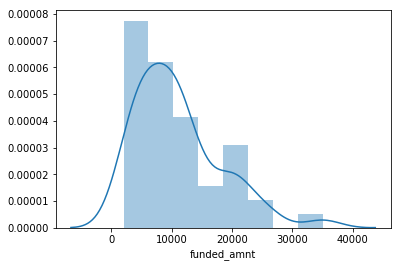

In [9]:
sns.distplot(df['funded_amnt'])

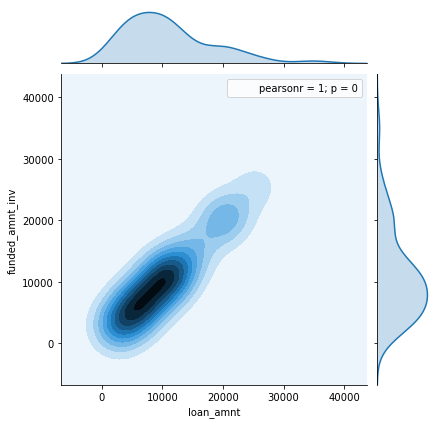

In [10]:
sns.jointplot(x='loan_amnt', y='funded_amnt_inv', data =df, kind = 'kde')

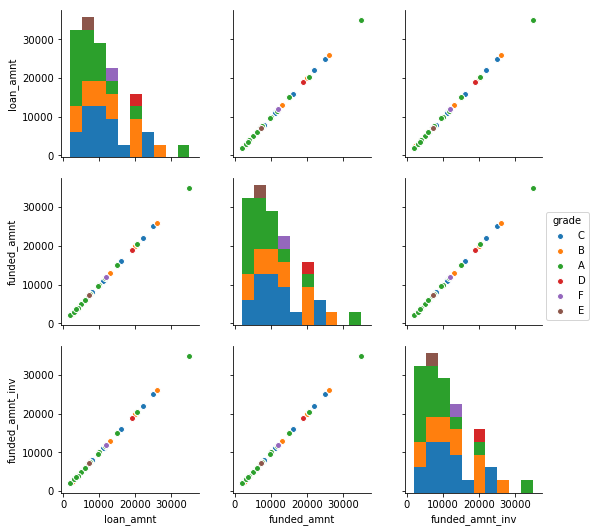

In [11]:
sns.pairplot(df, hue = 'grade')

In [12]:
#Regression Part 4

In [13]:
df_ml = pd.read_csv("ML2_new.csv")

In [14]:
df_ml.head()

,member_Id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,delinq_2yrs,mths_since_last_delinq,revol_bal,total_rec_late_fee,recoveries,application_type,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt
0,NaN,6000,36 months,13.99%,205.04,C,C3,Buyer,4 years,RENT,...,4,5.0,2289,0.0,0.0,Individual,71,57571,0,0
1,NaN,25000,60 months,14.49%,588.08,C,C4,USA,10+ years,MORTGAGE,...,0,48.0,16315,0.0,0.0,Individual,0,214917,0,0
2,NaN,10000,36 months,11.49%,329.72,B,B5,Teacher,10+ years,OWN,...,0,NaN,17209,0.0,0.0,Individual,1393,38085,0,0
3,NaN,8800,36 months,14.49%,302.87,C,C4,Customer Coordinator,5 years,RENT,...,0,NaN,2346,0.0,0.0,Individual,591,27455,0,0
4,NaN,6000,36 months,13.49%,203.59,C,C2,SERVICE MGR,5 years,RENT,...,0,NaN,4576,0.0,0.0,Individual,0,15393,0,0


In [15]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382442 entries, 0 to 382441
Data columns (total 26 columns):
member_Id                   283326 non-null float64
loan_amnt                   382442 non-null int64
term                        382442 non-null object
int_rate                    382442 non-null object
installment                 382442 non-null float64
grade                       382442 non-null object
sub_grade                   382442 non-null object
emp_title                   358980 non-null object
emp_length                  382442 non-null object
home_ownership              382442 non-null object
annual_inc                  382442 non-null float64
issue_d                     382442 non-null object
loan_status                 382442 non-null object
purpose                     382442 non-null object
title                       377013 non-null object
dti                         382442 non-null float64
delinq_2yrs                 382442 non-null int64
mths_since_last_deli

In [16]:
df_ml.describe()


,member_Id,loan_amnt,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,revol_bal,total_rec_late_fee,recoveries,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt
count,2.833260e+05,382442.000000,382442.000000,3.824420e+05,382442.000000,382442.000000,207821.000000,3.824420e+05,3.824420e+05,382442.000000,382442.000000,3.824420e+05,382442.000000,382442.000000
mean,9.980423e+07,14423.288564,438.127629,8.037915e+04,18.586832,0.363888,33.424755,1.638984e+04,6.401344e-01,17.484827,259.711219,1.449824e+05,0.008956,21.415216
std,7.214992e+06,9242.583576,278.996672,7.486363e+04,11.784556,0.961407,21.857898,2.270636e+04,6.062005e+00,253.692748,2415.577739,1.635759e+05,0.106483,932.162478
min,4.012430e+05,1000.000000,30.120000,1.000000e+00,-1.000000,0.000000,0.000000,0.000000e+00,-1.360000e-08,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,9.404694e+07,7200.000000,235.240000,4.800000e+04,12.220000,0.000000,15.000000,5.937000e+03,0.000000e+00,0.000000,0.000000,2.979200e+04,0.000000,0.000000
50%,9.737803e+07,12000.000000,361.930000,6.773540e+04,18.010000,0.000000,30.000000,1.103100e+04,0.000000e+00,0.000000,0.000000,8.130100e+04,0.000000,0.000000
75%,1.070578e+08,20000.000000,583.910000,9.600000e+04,24.360000,0.000000,48.000000,1.958000e+04,0.000000e+00,0.000000,0.000000,2.162525e+05,0.000000,0.000000
max,1.124413e+08,40000.000000,1719.830000,9.522972e+06,999.000000,42.000000,195.000000,1.698749e+06,3.680800e+02,37153.460000,932461.000000,8.524709e+06,8.000000,185408.000000


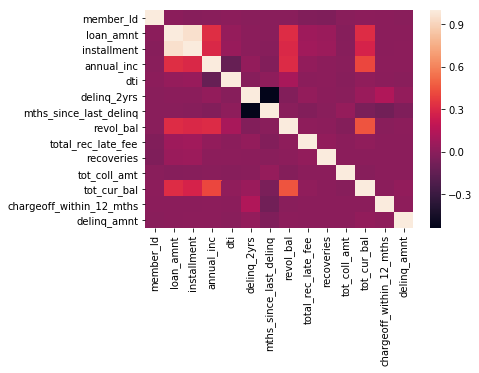

In [17]:
sns.heatmap(df_ml.corr())

In [18]:
df_ml.columns

Index(['member_Id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'mths_since_last_delinq', 'revol_bal', 'total_rec_late_fee',
       'recoveries', 'application_type', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt'],
      dtype='object')

In [19]:
X = df_ml[['annual_inc','dti']]

In [20]:
y = df_ml['loan_amnt']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=154)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# print the intercept
print(lm.intercept_)

10007.7267049


In [27]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
annual_inc,0.040749
dti,61.367990


In [28]:
predictions = lm.predict(X_test)

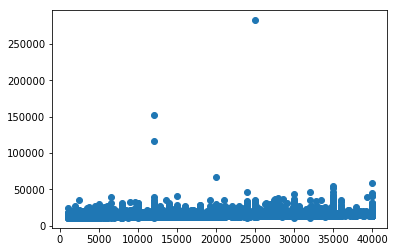

In [29]:
plt.scatter(y_test,predictions)

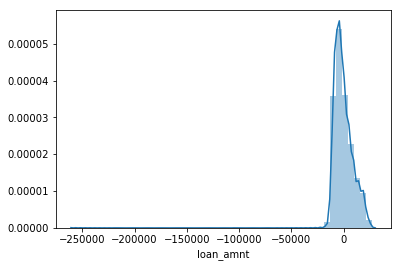

In [30]:
sns.distplot((y_test-predictions));

In [31]:
from sklearn import metrics

In [32]:
#metrics to check the regression
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6825.50660086
MSE: 73930561.4048
RMSE: 8598.28828342
